In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel('Sample Data.xlsx')
data.head()

,Survey Year,ID,Clarivate Analytics provides me with information and insights we can rely on.,I have positive interactions with Clarivate Analytics.,Clarivate Analytics offers high quality products and services.,Clarivate Analytics is easy to do business with.,I receive value from Clarivate Analytics based on the products and services provided.,What is one thing Clarivate Analytics is doing well and should continue?,What is one thing you would like to see Clarivate Analytics change or improve to better meet your needs?,What is your role as a Clarivate Analytics' customer?,Clarivate Products,Country,Clarivate Product Group,Region,Clarivate Business Unit
0,2019,R_1hNeF0hJOiEdZNp,Strongly Agree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WoSG,Belgium,Web of Science Core Collection,EMEA,Sciences
1,2019,R_2zTIGgCXSSbJ9MJ,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,NaN,NaN,NaN,WoSG,Israel,Incites,EMEA,Sciences
2,2019,R_2ANGQ9Z6T6HAQ0h,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Agree,Providing scientists with scientific informati...,NaN,End User of Products & Services,WoSG,Russian Federation,Web of Science Core Collection,EMEA,Sciences
3,2019,R_Z2Kvp3QO5Wkdu0h,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,NaN,NaN,End User of Products & Services,WoSG,United States,EndNote,Americas,Sciences
4,2019,R_1gwkxjFBAE0YUwg,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,NaN,NaN,NaN,WoSG,Brazil,Web of Science Core Collection,Americas,Sciences


In [6]:
data.shape

(1131, 15)

In [13]:
data.dtypes

Survey Year                                                                                                  int64
ID                                                                                                          object
Clarivate Analytics provides me with information and insights we can rely on.                               object
I have positive interactions with Clarivate Analytics.                                                      object
Clarivate Analytics offers high quality products and services.                                              object
Clarivate Analytics is easy to do business with.                                                            object
I receive value from Clarivate Analytics based on the products and services provided.                       object
What is one thing Clarivate Analytics is doing well and should continue?                                    object
What is one thing you would like to see Clarivate Analytics change or improve to

In [7]:
data.isna().sum()

Survey Year                                                                                                   0
ID                                                                                                            0
Clarivate Analytics provides me with information and insights we can rely on.                                 0
I have positive interactions with Clarivate Analytics.                                                      210
Clarivate Analytics offers high quality products and services.                                              214
Clarivate Analytics is easy to do business with.                                                            214
I receive value from Clarivate Analytics based on the products and services provided.                       215
What is one thing Clarivate Analytics is doing well and should continue?                                    764
What is one thing you would like to see Clarivate Analytics change or improve to better meet your needs?

In [140]:
data['Clarivate Analytics provides me with information and insights we can rely on.'].value_counts()

Agree                         536
Strongly Agree                401
Neither Agree nor Disagree    112
Strongly Disagree              42
Disagree                       40
Name: Clarivate Analytics provides me with information and insights we can rely on., dtype: int64

In [142]:
data['I have positive interactions with Clarivate Analytics.'].value_counts(dropna = False)

Agree                         462
Strongly Agree                281
NaN                           210
Neither Agree nor Disagree    130
Disagree                       32
Strongly Disagree              16
Name: I have positive interactions with Clarivate Analytics., dtype: int64

In [8]:
data['Survey Year'].unique()

array([2019, 2020], dtype=int64)

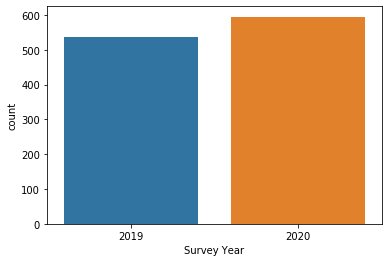

In [10]:
sns.countplot(x = 'Survey Year', data = data)
plt.show()

In [11]:
data['Survey Year'].value_counts()

2020    595
2019    536
Name: Survey Year, dtype: int64

In [14]:
data['Survey Year'] = data['Survey Year'].astype(np.object)
data.dtypes

Survey Year                                                                                                 object
ID                                                                                                          object
Clarivate Analytics provides me with information and insights we can rely on.                               object
I have positive interactions with Clarivate Analytics.                                                      object
Clarivate Analytics offers high quality products and services.                                              object
Clarivate Analytics is easy to do business with.                                                            object
I receive value from Clarivate Analytics based on the products and services provided.                       object
What is one thing Clarivate Analytics is doing well and should continue?                                    object
What is one thing you would like to see Clarivate Analytics change or improve to

In [17]:
pd.crosstab(data['Survey Year'], data['Clarivate Products'])

Clarivate Products,CompuMark,Derwent,Life Sciences,MarkMonitor,Techstreet,WoSG,WosG
Survey Year,,,,,,,
2019,14,26,31,3,4,457,1
2020,18,1,34,4,3,535,0


In [20]:
data.groupby('Survey Year')['Clarivate Products'].value_counts()

Survey Year  Clarivate Products
2019         WoSG                  457
             Life Sciences          31
             Derwent                26
             CompuMark              14
             Techstreet              4
             MarkMonitor             3
             WosG                    1
2020         WoSG                  535
             Life Sciences          34
             CompuMark              18
             MarkMonitor             4
             Techstreet              3
             Derwent                 1
Name: Clarivate Products, dtype: int64

In [24]:
data.iloc[:, 2].unique()

array(['Strongly Agree', 'Agree', 'Neither Agree nor Disagree',
       'Strongly Disagree', 'Disagree'], dtype=object)

### Which Clarivate Products Dominating The Market?

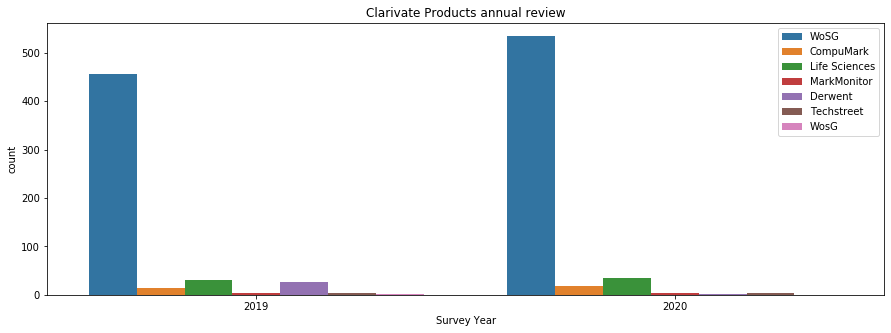

In [57]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Survey Year', hue = 'Clarivate Products', data = data)
plt.title('Clarivate Products annual review')
plt.legend()
plt.show()

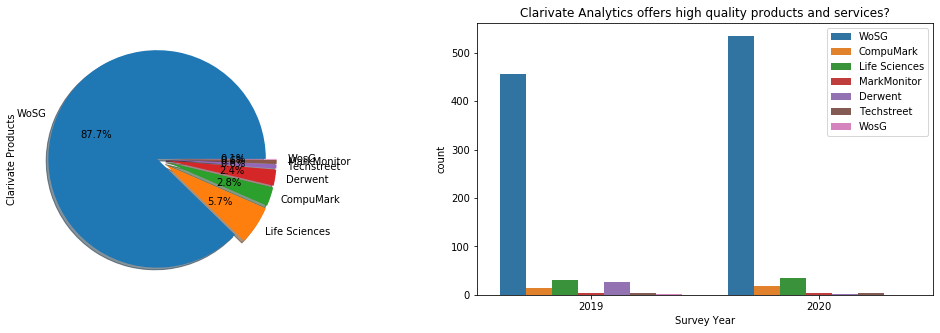

In [97]:
f,ax = plt.subplots(1,2, figsize = (18,5))
data['Clarivate Products'].value_counts().plot.pie(ax = ax[0], explode = [0,0.1,0.1,0.1,0.1,0.1,0.1], shadow = True, autopct = '%1.1f%%')
ax[1].set_title('Clarivate Analytics offers high quality products and services?')
sns.countplot(x = 'Survey Year', hue = 'Clarivate Products', data = data,ax = ax[1])
plt.legend()
plt.show()

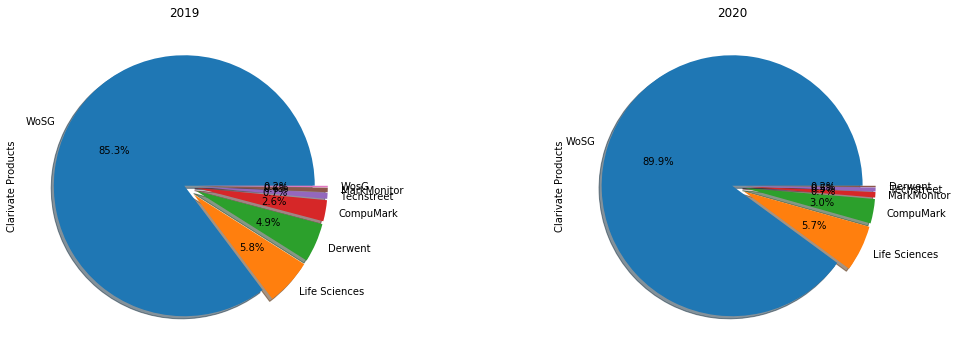

In [99]:
f,ax = plt.subplots(1,2, figsize = (18,6))
data[data['Survey Year'] == 2019]['Clarivate Products'].value_counts().plot.pie(ax = ax[0], explode = [0,0.1,0.1,0.1,0.1,0.1,0.1], shadow = True, autopct = '%1.1f%%')
data[data['Survey Year'] == 2020]['Clarivate Products'].value_counts().plot.pie(ax = ax[1], explode = [0,0.1,0.1,0.1,0.1,0.1], shadow = True, autopct = '%1.1f%%')
ax[0].set_title('2019')
ax[1].set_title('2020')
# plt.title('Clarivate Analytics offers high quality products and services?')
# plt.legend()
plt.show()

### Clarivate Analytics offers high quality products and services over years ?

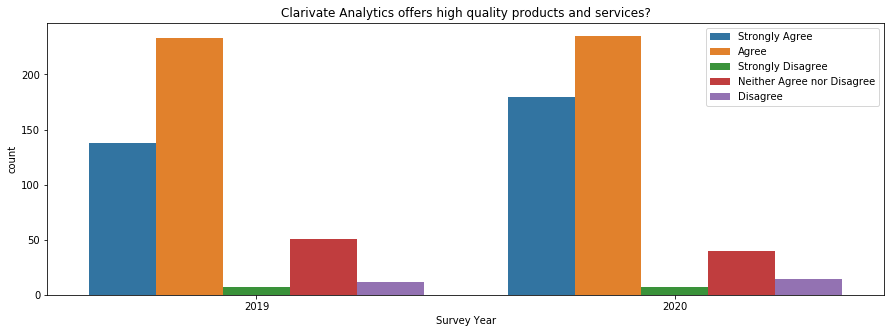

In [44]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Survey Year', hue = 'Clarivate Analytics offers high quality products and services.', data = data)
plt.title('Clarivate Analytics offers high quality products and services?')
plt.legend()
plt.show()

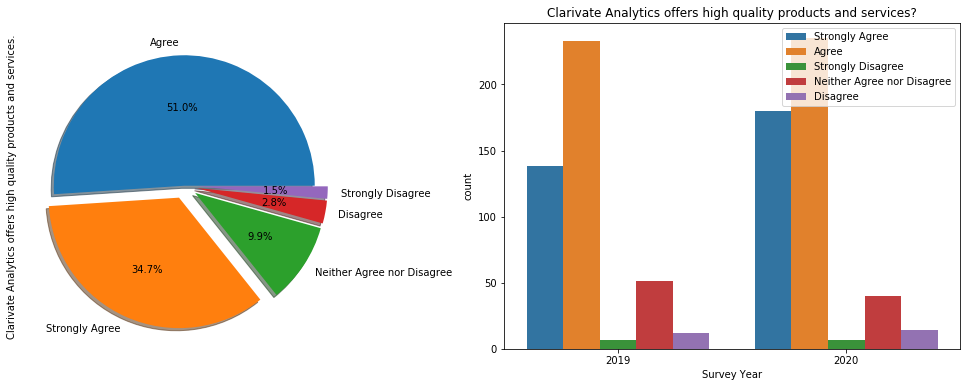

In [78]:
f,ax = plt.subplots(1,2, figsize = (18,6))
data['Clarivate Analytics offers high quality products and services.'].value_counts().plot.pie(ax = ax[0], explode = [0,0.1,0.1,0.1,0.1], shadow = True, autopct = '%1.1f%%')
ax[1].set_title('Clarivate Analytics offers high quality products and services?')
sns.countplot(x = 'Survey Year', hue = 'Clarivate Analytics offers high quality products and services.', data = data,ax = ax[1])
plt.legend()
plt.show()

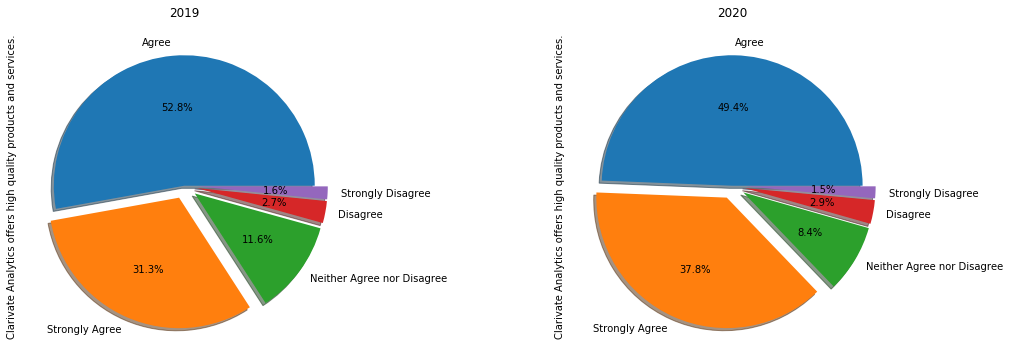

In [88]:
f,ax = plt.subplots(1,2, figsize = (18,6))
data[data['Survey Year'] == 2019]['Clarivate Analytics offers high quality products and services.'].value_counts().plot.pie(ax = ax[0], explode = [0,0.1,0.1,0.1,0.1], shadow = True, autopct = '%1.1f%%')
data[data['Survey Year'] == 2020]['Clarivate Analytics offers high quality products and services.'].value_counts().plot.pie(ax = ax[1], explode = [0,0.1,0.1,0.1,0.1], shadow = True, autopct = '%1.1f%%')

ax[0].set_title('2019')
ax[1].set_title('2020')
# plt.title('Clarivate Analytics offers high quality products and services?')
# plt.legend()
plt.show()

### Clarivate Analytics is easy to do business with ?

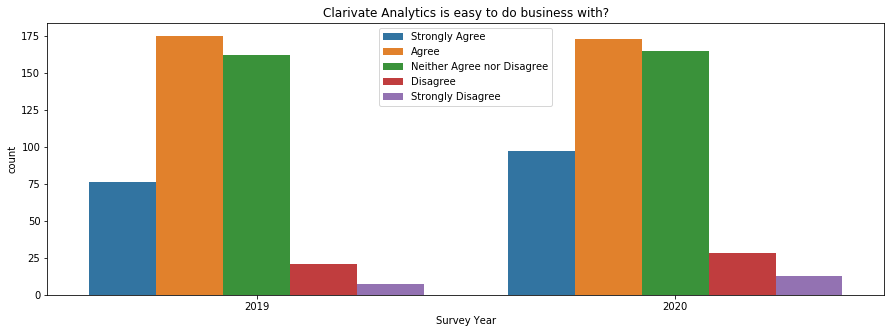

In [52]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Survey Year', hue = 'Clarivate Analytics is easy to do business with.', data = data)
plt.title('Clarivate Analytics is easy to do business with?')
plt.legend()
plt.show()

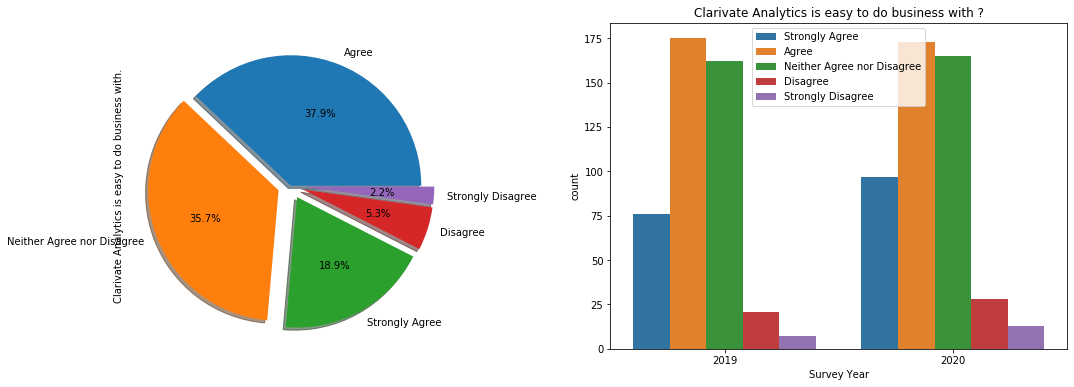

In [100]:
f,ax = plt.subplots(1,2, figsize = (18,6))
data['Clarivate Analytics is easy to do business with.'].value_counts().plot.pie(ax = ax[0], explode = [0,0.1,0.1,0.1,0.1], shadow = True, autopct = '%1.1f%%')
ax[1].set_title('Clarivate Analytics is easy to do business with ?')
sns.countplot(x = 'Survey Year', hue = 'Clarivate Analytics is easy to do business with.', data = data,ax = ax[1])
plt.legend()
plt.show()

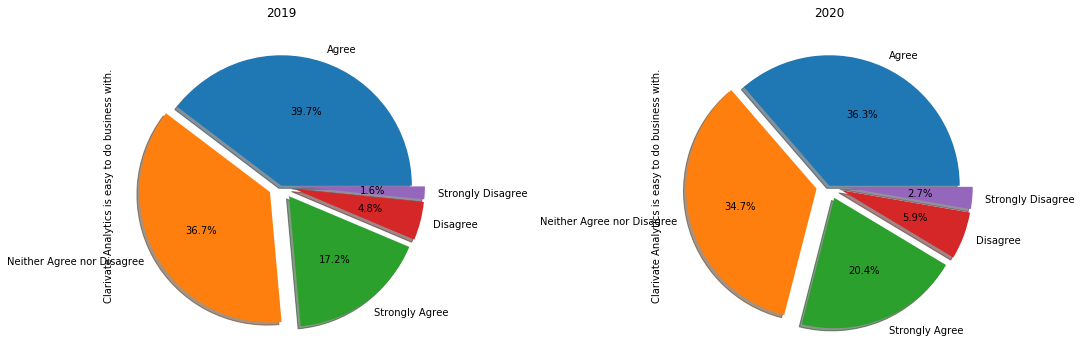

In [101]:
f,ax = plt.subplots(1,2, figsize = (18,6))
data[data['Survey Year'] == 2019]['Clarivate Analytics is easy to do business with.'].value_counts().plot.pie(ax = ax[0], explode = [0,0.1,0.1,0.1,0.1], shadow = True, autopct = '%1.1f%%')
data[data['Survey Year'] == 2020]['Clarivate Analytics is easy to do business with.'].value_counts().plot.pie(ax = ax[1], explode = [0,0.1,0.1,0.1,0.1], shadow = True, autopct = '%1.1f%%')

ax[0].set_title('2019')
ax[1].set_title('2020')
# plt.title('Clarivate Analytics offers high quality products and services?')
# plt.legend()
plt.show()

### Clarivate Analytics provides me with information and insights we can rely on ?

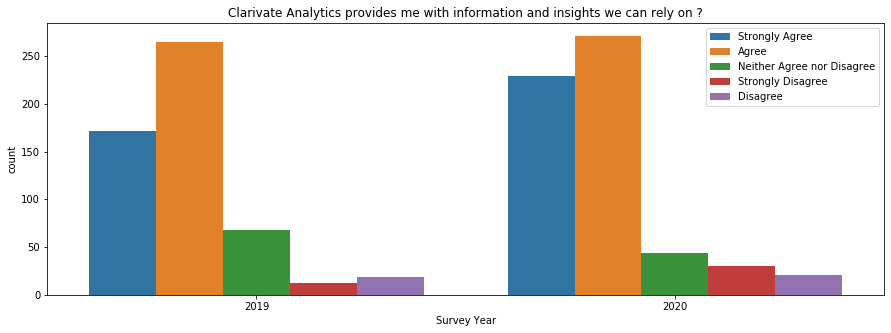

In [53]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Survey Year', hue = 'Clarivate Analytics provides me with information and insights we can rely on.', data = data)
plt.title('Clarivate Analytics provides me with information and insights we can rely on ?')
plt.legend()
plt.show()

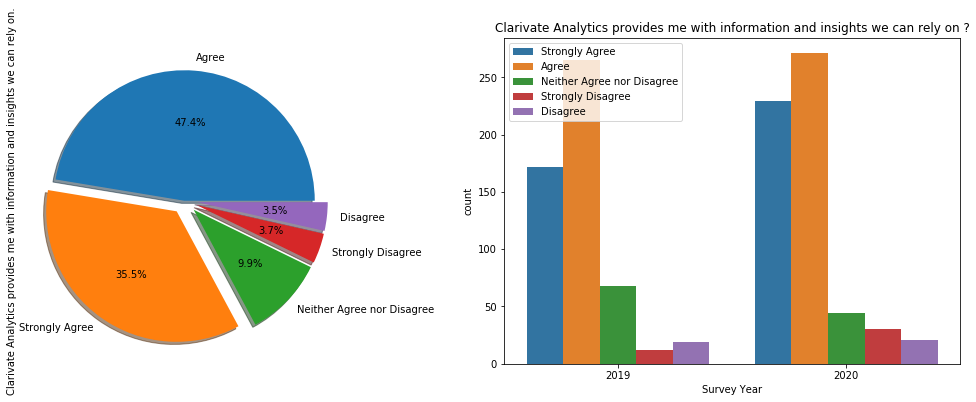

In [102]:
f,ax = plt.subplots(1,2, figsize = (18,6))
data['Clarivate Analytics provides me with information and insights we can rely on.'].value_counts().plot.pie(ax = ax[0], explode = [0,0.1,0.1,0.1,0.1], shadow = True, autopct = '%1.1f%%')
ax[1].set_title('Clarivate Analytics provides me with information and insights we can rely on ?')
sns.countplot(x = 'Survey Year', hue = 'Clarivate Analytics provides me with information and insights we can rely on.', data = data,ax = ax[1])
plt.legend()
plt.show()

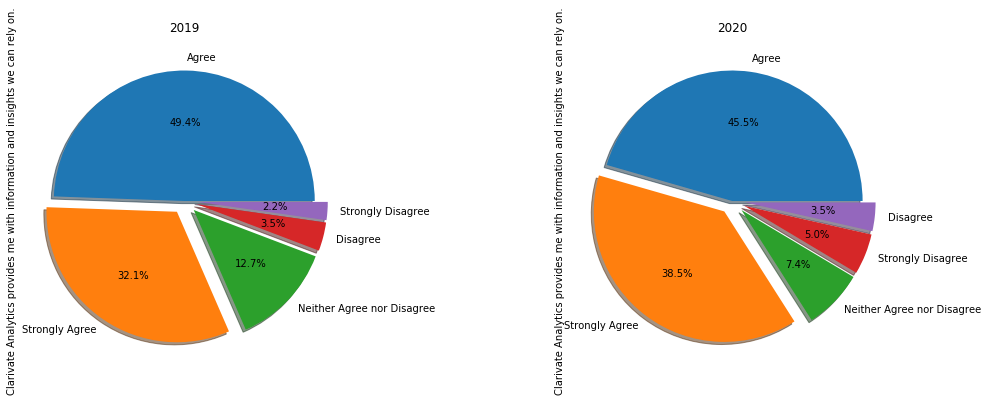

In [103]:
f,ax = plt.subplots(1,2, figsize = (18,6))
data[data['Survey Year'] == 2019]['Clarivate Analytics provides me with information and insights we can rely on.'].value_counts().plot.pie(ax = ax[0], explode = [0,0.1,0.1,0.1,0.1], shadow = True, autopct = '%1.1f%%')
data[data['Survey Year'] == 2020]['Clarivate Analytics provides me with information and insights we can rely on.'].value_counts().plot.pie(ax = ax[1], explode = [0,0.1,0.1,0.1,0.1], shadow = True, autopct = '%1.1f%%')

ax[0].set_title('2019')
ax[1].set_title('2020')
# plt.title('Clarivate Analytics offers high quality products and services?')
# plt.legend()
plt.show()

### Which Region Is Dominate Player ?

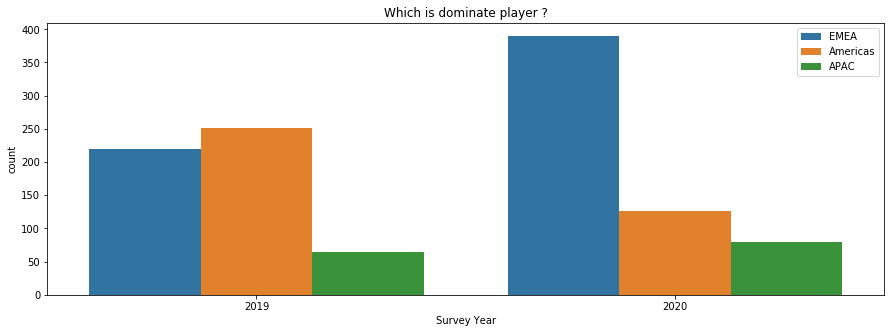

In [60]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Survey Year', hue = 'Region', data = data)
plt.title('Which Region is dominate player ?')
plt.legend()
plt.show()

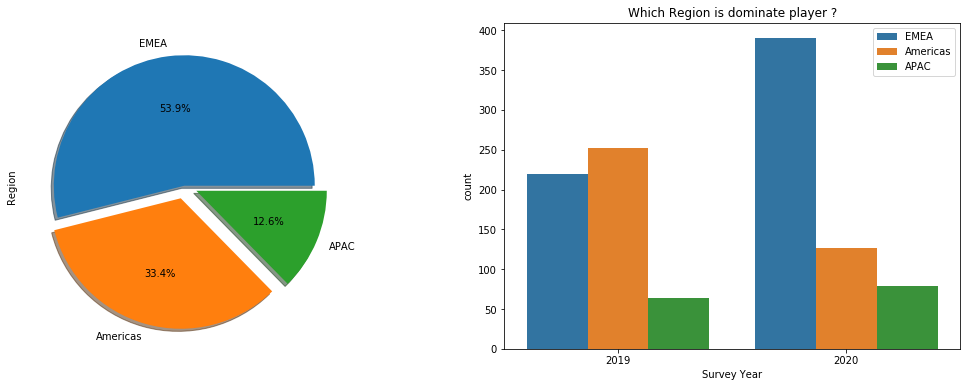

In [106]:
f,ax = plt.subplots(1,2, figsize = (18,6))
data['Region'].value_counts().plot.pie(ax = ax[0], explode = [0,0.1,0.1], shadow = True, autopct = '%1.1f%%')
ax[1].set_title('Which Region is dominate player ?')
sns.countplot(x = 'Survey Year', hue = 'Region', data = data,ax = ax[1])
plt.legend()
plt.show()

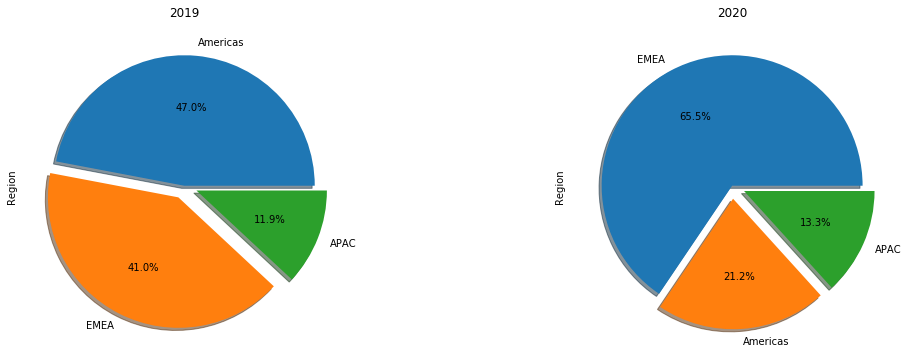

In [107]:
f,ax = plt.subplots(1,2, figsize = (18,6))
data[data['Survey Year'] == 2019]['Region'].value_counts().plot.pie(ax = ax[0], explode = [0,0.1,0.1], shadow = True, autopct = '%1.1f%%')
data[data['Survey Year'] == 2020]['Region'].value_counts().plot.pie(ax = ax[1], explode = [0,0.1,0.1], shadow = True, autopct = '%1.1f%%')

ax[0].set_title('2019')
ax[1].set_title('2020')
# plt.title('Clarivate Analytics offers high quality products and services?')
# plt.legend()
plt.show()

### Which Business unit is a key player ?

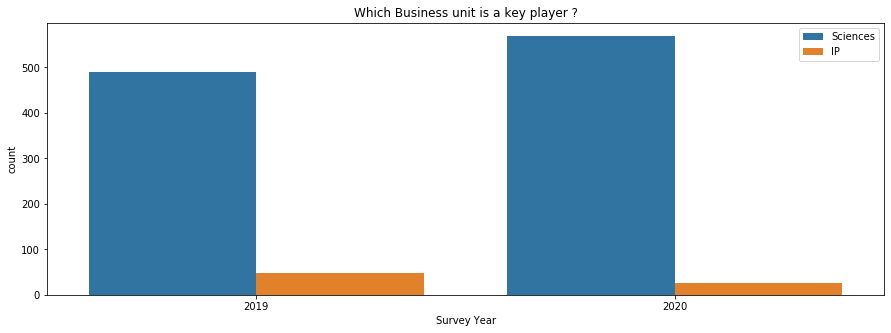

In [65]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Survey Year', hue = 'Clarivate Business Unit', data = data)
plt.title('Which Business unit is a key player ?')
plt.legend()
plt.show()

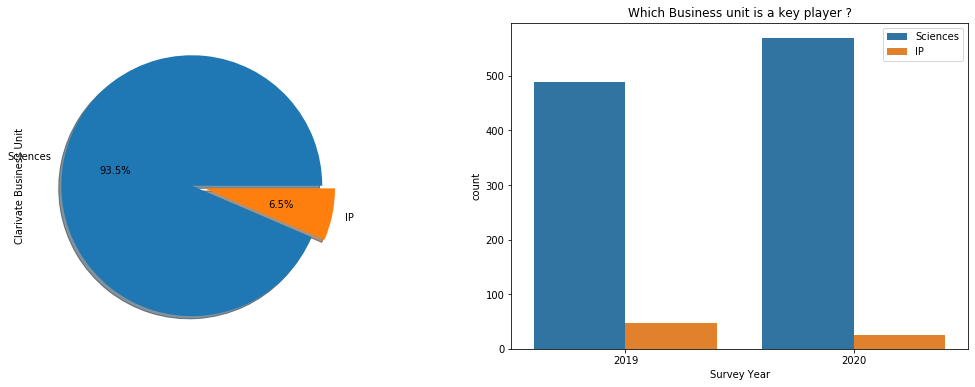

In [111]:
f,ax = plt.subplots(1,2, figsize = (18,6))
data['Clarivate Business Unit'].value_counts().plot.pie(ax = ax[0], explode = [0,0.1], shadow = True, autopct = '%1.1f%%')
ax[1].set_title('Which Business unit is a key player ?')
sns.countplot(x = 'Survey Year', hue = 'Clarivate Business Unit', data = data,ax = ax[1])
plt.legend()
plt.show()

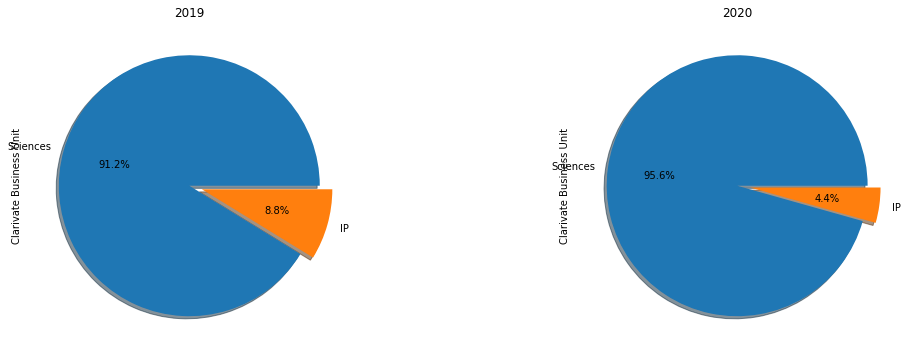

In [109]:
f,ax = plt.subplots(1,2, figsize = (18,6))
data[data['Survey Year'] == 2019]['Clarivate Business Unit'].value_counts().plot.pie(ax = ax[0], explode = [0,0.1], shadow = True, autopct = '%1.1f%%')
data[data['Survey Year'] == 2020]['Clarivate Business Unit'].value_counts().plot.pie(ax = ax[1], explode = [0,0.1], shadow = True, autopct = '%1.1f%%')

ax[0].set_title('2019')
ax[1].set_title('2020')
# plt.title('Clarivate Analytics offers high quality products and services?')
# plt.legend()
plt.show()

### How positive Clarivate Analytics interact with ?

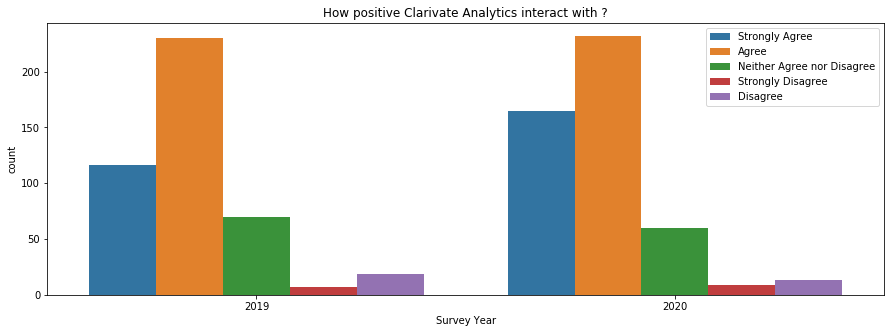

In [68]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Survey Year', hue = 'I have positive interactions with Clarivate Analytics.', data = data)
plt.title('How positive Clarivate Analytics interact with ?')
plt.legend()
plt.show()

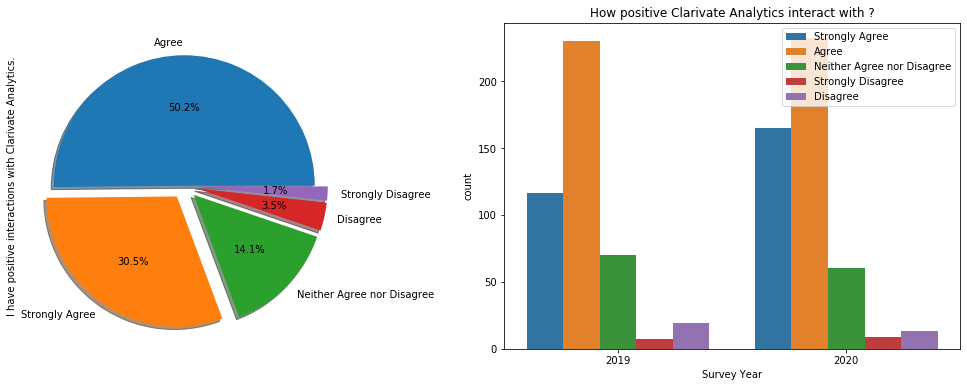

In [112]:
f,ax = plt.subplots(1,2, figsize = (18,6))
data['I have positive interactions with Clarivate Analytics.'].value_counts().plot.pie(ax = ax[0], explode = [0,0.1,0.1,0.1,0.1], shadow = True, autopct = '%1.1f%%')
ax[1].set_title('How positive Clarivate Analytics interact with ?')
sns.countplot(x = 'Survey Year', hue = 'I have positive interactions with Clarivate Analytics.', data = data,ax = ax[1])
plt.legend()
plt.show()

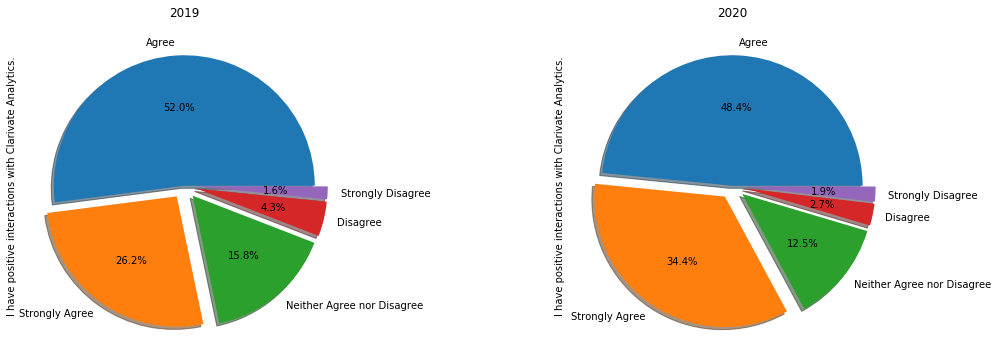

In [113]:
f,ax = plt.subplots(1,2, figsize = (18,6))
data[data['Survey Year'] == 2019]['I have positive interactions with Clarivate Analytics.'].value_counts().plot.pie(ax = ax[0], explode = [0,0.1,0.1,0.1,0.1], shadow = True, autopct = '%1.1f%%')
data[data['Survey Year'] == 2020]['I have positive interactions with Clarivate Analytics.'].value_counts().plot.pie(ax = ax[1], explode = [0,0.1,0.1,0.1,0.1], shadow = True, autopct = '%1.1f%%')

ax[0].set_title('2019')
ax[1].set_title('2020')
# plt.title('Clarivate Analytics offers high quality products and services?')
# plt.legend()
plt.show()

### Products & Sevices of Clarivate Analytics Worth Value ?

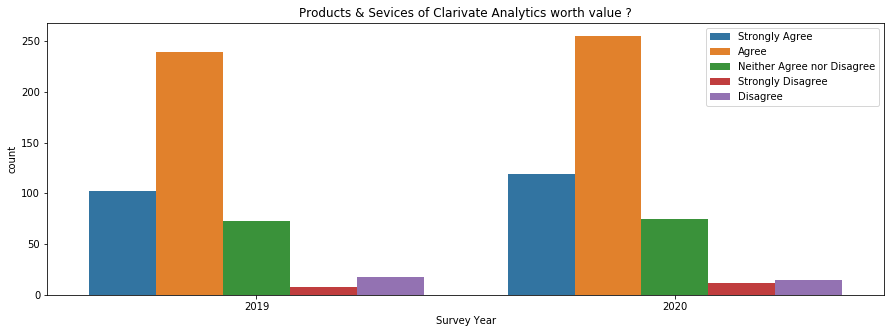

In [70]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Survey Year', hue = 'I receive value from Clarivate Analytics based on the products and services provided.', data = data)
plt.title('Products & Sevices of Clarivate Analytics worth value ?')
plt.legend()
plt.show()

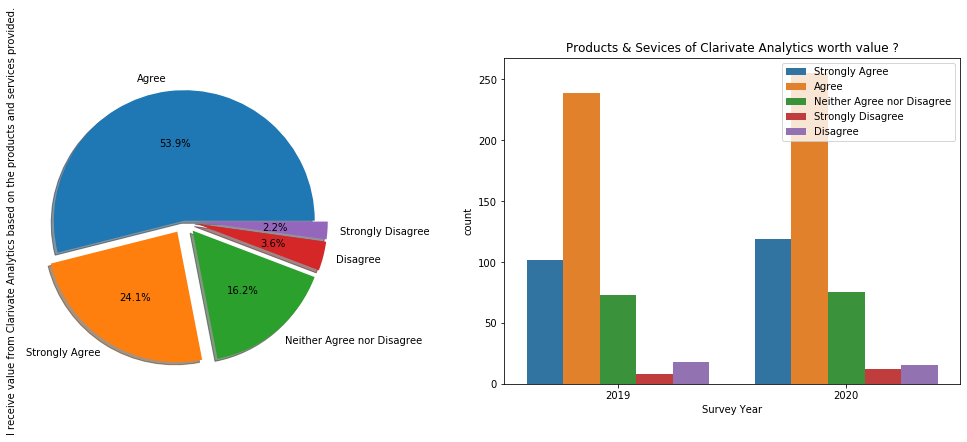

In [114]:
f,ax = plt.subplots(1,2, figsize = (18,6))
data['I receive value from Clarivate Analytics based on the products and services provided.'].value_counts().plot.pie(ax = ax[0], explode = [0,0.1,0.1,0.1,0.1], shadow = True, autopct = '%1.1f%%')
ax[1].set_title('Products & Sevices of Clarivate Analytics worth value ?')
sns.countplot(x = 'Survey Year', hue = 'I receive value from Clarivate Analytics based on the products and services provided.', data = data,ax = ax[1])
plt.legend()
plt.show()

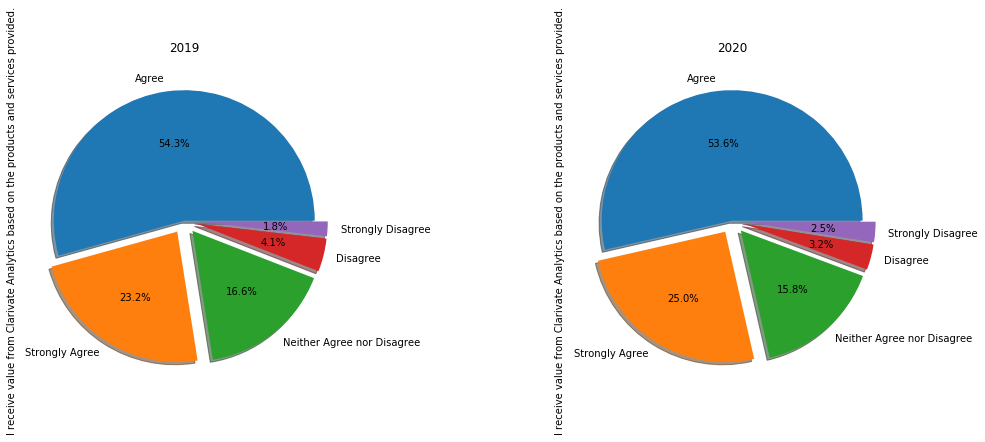

In [115]:
f,ax = plt.subplots(1,2, figsize = (18,6))
data[data['Survey Year'] == 2019]['I receive value from Clarivate Analytics based on the products and services provided.'].value_counts().plot.pie(ax = ax[0], explode = [0,0.1,0.1,0.1,0.1], shadow = True, autopct = '%1.1f%%')
data[data['Survey Year'] == 2020]['I receive value from Clarivate Analytics based on the products and services provided.'].value_counts().plot.pie(ax = ax[1], explode = [0,0.1,0.1,0.1,0.1], shadow = True, autopct = '%1.1f%%')

ax[0].set_title('2019')
ax[1].set_title('2020')
# plt.title('Clarivate Analytics offers high quality products and services?')
# plt.legend()
plt.show()